In [6]:
! pip install face_recognition

     |████████████████████████████████| 100.2MB 99kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=cc74888f2b74241272260094a822432573817913754c800d407ed0dd05e99d24
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
!mkdir known
!wget https://www.deccanherald.com/sites/dh/files/articleimages/2020/06/03/Modi-1591133748.jpg -O known/modi.jpg
!wget https://imgk.timesnownews.com/story/Arvind_Kejriwal_0.jpg?tr=w-600,h-450 -O known/kejriwal.jpg
!wget https://www.oneindia.com/politicians/image/302x100x402x1/rahul-gandhi-35867.jpg -O known/rahul.jpg

Error: Jupyter cannot be started. Error attempting to locate jupyter: Data Science libraries jupyter and notebook are not installed in interpreter Python 3.8.2 64-bit.

In [4]:
!mkdir unknown
!wget https://cdn.dnaindia.com/sites/default/files/styles/full/public/2017/11/06/622575-gandhi-rahul-110617.jpg -O unknown/1.jpg
!wget https://www.firstpost.com/wp-content/uploads/2014/11/ArvindKejriwal-presser_PTI.jpg -O unknown/2.jpg
!wget https://images.newindianexpress.com/uploads/user/imagelibrary/2020/4/1/w900X450/PTI2_28_2020_000136B.jpg -O unknown/3.jpg
!wget https://img.dtnext.in/Articles/2020/Jun/202006141452160318_Congress-questions-Modis-silence-on-LAC-faceoff_SECVPF.gif -O unknown/4.jpg
!wget https://images.outlookindia.com/public/uploads/articles/2020/6/17/Modi_570_850.JPG -O unknown/5.jpg
!wget https://www.deccanherald.com/sites/dh/files/articleimages/2020/07/11/amit%20shah-1594475208.jpg -O unknown/6.jpg

--2020-07-12 11:44:27--  https://cdn.dnaindia.com/sites/default/files/styles/full/public/2017/11/06/622575-gandhi-rahul-110617.jpg
Resolving cdn.dnaindia.com (cdn.dnaindia.com)... 184.24.77.40, 184.24.77.41, 2a02:26f0:ce::215:e44b, ...
Connecting to cdn.dnaindia.com (cdn.dnaindia.com)|184.24.77.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64190 (63K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]  62.69K   330KB/s    in 0.2s    

2020-07-12 11:44:28 (330 KB/s) - ‘unknown/1.jpg’ saved [64190/64190]

--2020-07-12 11:44:30--  https://www.firstpost.com/wp-content/uploads/2014/11/ArvindKejriwal-presser_PTI.jpg
Resolving www.firstpost.com (www.firstpost.com)... 23.213.165.237
Connecting to www.firstpost.com (www.firstpost.com)|23.213.165.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19900 (19K) [image/jpeg]
Saving to: ‘unknown/2.jpg’

unknown/2.jpg       100%[===================>]  19.43K

In [7]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

In [8]:
img = cv2.imread('known/modi.jpg')

In [12]:
print(img)
img.shape

[[[162 146 130]
  [161 145 129]
  [161 145 129]
  ...
  [193 177 160]
  [193 177 160]
  [193 177 160]]

 [[162 146 130]
  [161 145 129]
  [161 145 129]
  ...
  [193 177 160]
  [193 177 160]
  [193 177 160]]

 [[162 146 130]
  [161 145 129]
  [161 145 129]
  ...
  [193 177 160]
  [193 177 160]
  [193 177 160]]

 ...

 [[165 150 134]
  [165 150 134]
  [165 150 134]
  ...
  [188 170 153]
  [188 170 153]
  [188 170 153]]

 [[167 152 136]
  [166 151 135]
  [165 150 134]
  ...
  [188 170 153]
  [188 170 153]
  [188 170 153]]

 [[167 152 136]
  [166 151 135]
  [165 150 134]
  ...
  [188 170 153]
  [188 170 153]
  [188 170 153]]]


In [13]:
def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int (h * ratio)
    return cv2.resize(img, (width, height))

In [15]:
img_enc = face_recognition.face_encodings(img)[0]
img_enc

array([-1.26946345e-01,  7.81171247e-02,  7.30590001e-02, -4.58998606e-02,
       -1.16179064e-02, -8.87862071e-02,  7.77930617e-02, -8.06978419e-02,
        1.81366891e-01,  1.37173850e-02,  2.40447149e-01,  1.22144781e-02,
       -2.45954514e-01, -1.00169212e-01,  4.00729701e-02,  8.52859095e-02,
       -1.54908031e-01, -1.33319631e-01, -9.71139520e-02, -1.13728113e-01,
        4.04659584e-02,  1.16944015e-02,  6.88989311e-02,  2.41834037e-02,
       -1.21620581e-01, -3.12195450e-01, -1.16957337e-01, -1.90616950e-01,
        2.64501572e-02, -9.93024036e-02,  9.41548590e-03,  2.81844661e-02,
       -2.07451671e-01, -1.02797590e-01, -4.48619202e-03,  1.68267153e-02,
       -1.66599173e-02, -7.37308562e-02,  1.38856456e-01, -3.95660326e-02,
       -1.10526018e-01,  1.88449435e-02,  9.13067758e-02,  1.27994776e-01,
        2.54863858e-01,  3.31774130e-02,  1.81750581e-03, -7.52837360e-02,
        2.92638876e-03, -2.32086927e-01,  8.77769366e-02,  9.95778590e-02,
        4.00528088e-02,  

In [17]:
known_encodings = []
known_names = []

In [18]:
known_dir = 'known'
for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

Processing 3.jpg


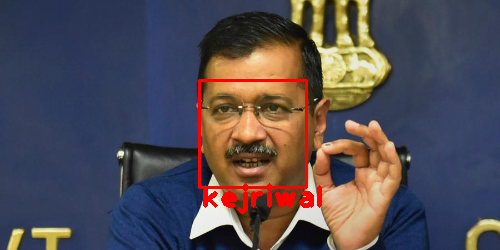

Processing 2.jpg


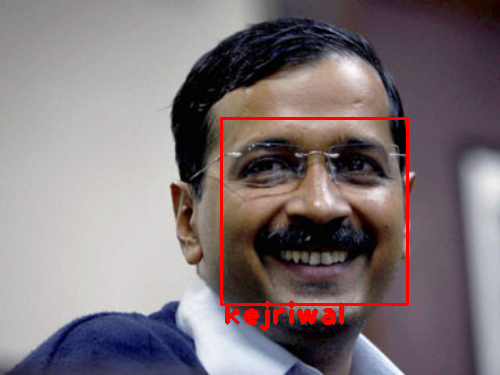

Processing 4.jpg


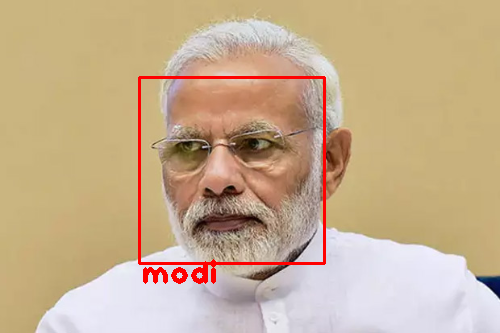

Processing 6.jpg
Processing 5.jpg


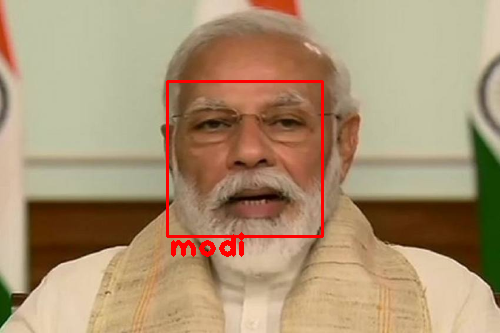

Processing 1.jpg


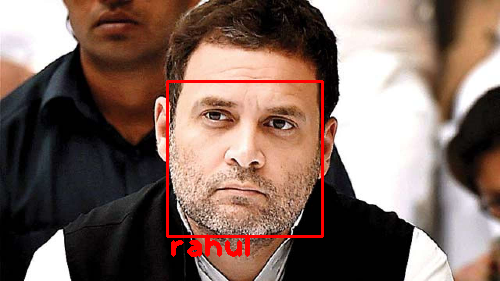

In [21]:
unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    print('Processing', file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    #print(face_recognition.face_distance(known_encodings, img_enc))
    
    for i in range(len(results)):
        if (results[i]):
            name = known_names[i]
            (t, r, b, l) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 2)
            cv2.putText(img, name, (l+2, b+20), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 3)
            cv2_imshow(img)

    #print(results)